In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r"E:\ML exercise\ANN updated 2.xlsx")

In [3]:
df.isna().dropna()

,P,V,n,Total,Depth
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
211,False,False,False,False,False
212,False,False,False,False,False
213,False,False,False,False,False
214,False,False,False,False,False


In [4]:
df.columns

Index(['P', 'V', 'n', 'Total', 'Depth'], dtype='object')

In [5]:
df.dtypes

P          int64
V          int64
n          int64
Total    float64
Depth    float64
dtype: object

In [6]:
colums = ['P', 'V', 'n','Total']
X_train = df[colums]

In [7]:
y_train = df.Depth

In [8]:
len(y_train)

216

In [9]:
len(X_train)

216

In [10]:
df_test = pd.read_excel(r"E:\ML exercise\ANN_test_2.xlsx")

In [11]:
df_test.head()

,P,V,n,Total,Depth
0,8,25,2,0.32,0.9860
1,8,25,4,0.32,1.3810
2,8,25,6,0.32,1.6290
3,8,50,2,0.16,0.9700
4,8,50,4,0.16,1.3613


In [12]:
y_test = df_test.Depth

In [13]:
df_test.drop('Depth',axis='columns',inplace=True)

In [14]:
X_test = df_test

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [78]:
lr = LinearRegression(fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None)

In [79]:
rf = RandomForestRegressor(n_estimators=130,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None)

In [87]:
gbr = GradientBoostingRegressor(loss='ls',
    learning_rate=0.1,
    n_estimators=150,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='deprecated',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0)

In [88]:
ls = Lasso(alpha=1.0,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic')

In [89]:
r = Ridge(alpha=1.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None)

In [90]:
lsvc = SVR(kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,)

In [91]:
def general_function(model,X_train,y_train,X_test,y_test,name):
    error1=[]
    error2=[]
    m = model.fit(X_train,y_train)
    y_predict = m.predict(X_test)
    score = m.score(X_test,y_test)
    msr = mean_squared_error(y_test,y_predict)
    rmse = np.sqrt(msr)
    mabe = mean_absolute_error(y_test,y_predict)
    plt.xlabel("Depth Predicted")
    plt.ylabel("Actual Depth")
    plt.scatter(y_test,y_predict,label=name)
    plt.legend()
    return print("Mean Square Error, Root Mean Error, Absolute Mean Error and score",msr,rmse,mabe,score)    

In [92]:
from sklearn.pipeline import make_pipeline

Mean Square Error, Root Mean Error, Absolute Mean Error and score 0.01512708034961967 0.12299219629561735 0.11553060768454945 0.8064063915815426
Mean Square Error, Root Mean Error, Absolute Mean Error and score 0.013880848290872504 0.11781701189078131 0.11216308174193948 0.8223554416033264
Mean Square Error, Root Mean Error, Absolute Mean Error and score 0.01365890907249135 0.11687133554679414 0.11120241892159122 0.8251957791399125
Mean Square Error, Root Mean Error, Absolute Mean Error and score 0.11633548918354197 0.34107988680592405 0.2982556244146932 -0.48884031932405003
Mean Square Error, Root Mean Error, Absolute Mean Error and score 0.015213640148794224 0.12334358576267444 0.11598178011509522 0.8052986150986471
Mean Square Error, Root Mean Error, Absolute Mean Error and score 0.05658748847001263 0.23788124867255223 0.20647560913134858 0.2758036692438781


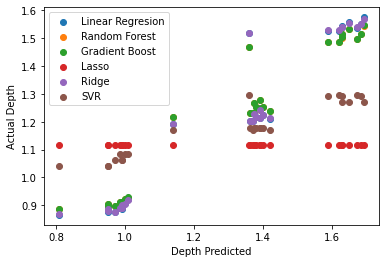

In [93]:
estimator = make_pipeline(general_function(lr,X_train,y_train,X_test,y_test,"Linear Regresion"),
                     general_function(rf,X_train,y_train,X_test,y_test,"Random Forest"),
                     general_function(gbr,X_train,y_train,X_test,y_test,"Gradient Boost"),
                     general_function(ls,X_train,y_train,X_test,y_test,"Lasso"),
                     general_function(r,X_train,y_train,X_test,y_test,"Ridge"),
                     general_function(lsvc,X_train,y_train,X_test,y_test,"SVR"))